# FFT Development

In [166]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

# Define a macrospin mesh (i.e. one discretisation cell).
p1 = (0, 0, 0)  # first point of the mesh domain (m)
p2 = (2e-9, 1e-9, 1e-9)  # second point of the mesh domain (m)
n = (2, 1, 1)  # discretisation

Ms = 8e6  # magnetisation saturation (A/m)
H = (0, 0, 2e6)  # external magnetic field (A/m)
A=1e-12  # Exchange
gamma0 = 2.211e5  # gyromagnetic ratio (m/As)
alpha = 0.1  # Gilbert damping

region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, n=n)

system = mm.System(name='twospin')
system.energy = mm.Zeeman(H=H) + mm.Exchange(A=A)
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)
system.m = df.Field(mesh, dim=3, value=(1, 0, 0), norm=Ms)

td = mc.TimeDriver()
td.drive(system, t=0.1e-9, n=200)

Running OOMMF (DockerOOMMFRunner) [2021/08/20 16:19]... (5.8 s)


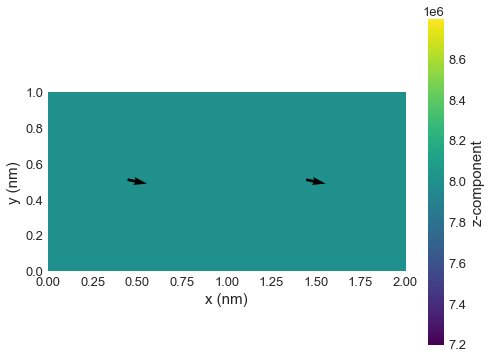

In [167]:
system.m.plane('z').mpl()

In [168]:
import micromagneticdata as md
import numpy as np

In [169]:
drive = md.Drive(name='twospin', number=0)

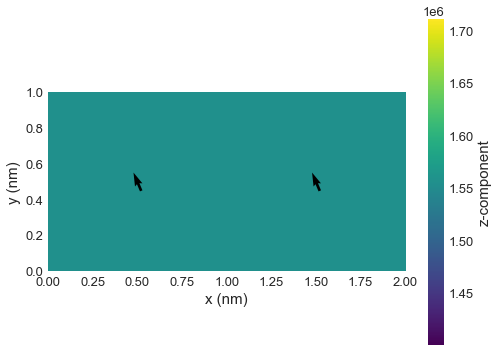

In [170]:
drive[8].plane('z').mpl()

In [214]:
drive.x

't'

In [219]:
def rfft(drive):
    freqs = np.fft.rfftfreq(drive.table.data[drive.x].size, drive.table.dx)
    tot = []
    for i in np.arange(drive.n):
        tot.append(drive[i].array)
    f = np.fft.rfft(tot, axis=0)
    f_field = []
    for i in np.arange(f.shape[0]):
        f_field.append(df.Field(mesh=drive.m0.mesh, dim=drive.m0.dim, value=f[i, ...]))
    return freqs, f_field

In [220]:
freqs, out = rfft(drive)

In [222]:
f_field_ave = []
for i in np.arange(f.shape[0]):
    f_field_ave.append(f_field[i].average)

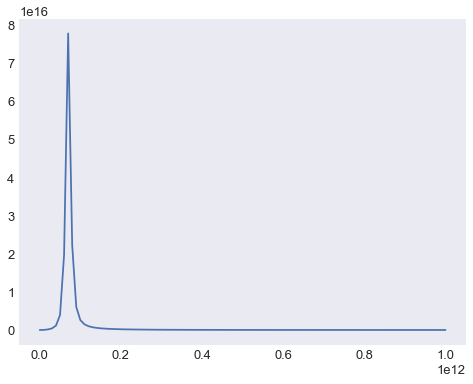

In [228]:
plt.plot(freqs, (np.abs(f_field_ave)**2)[:,0])

In [179]:
f_field = []
for i in np.arange(f.shape[0]):
    f_field.append(df.Field(mesh=drive.m0.mesh, dim=drive.m0.dim, value=f[i, ...]))

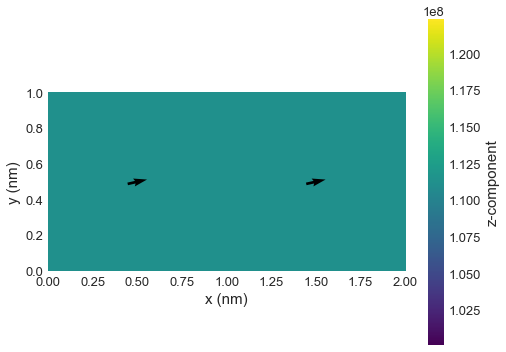

In [192]:
f_field[2].plane('z').imag.mpl()

In [200]:
f_field_ave = []
for i in np.arange(f.shape[0]):
    f_field_ave.append(f_field[i].average)

In [206]:
psd = np.abs(f_field_ave)**2

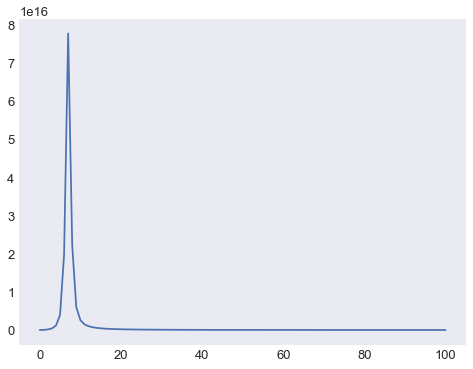

In [209]:
plt.plot(psd[:,0])

In [177]:
f_sum = f.sum(axis=(1,2,3))

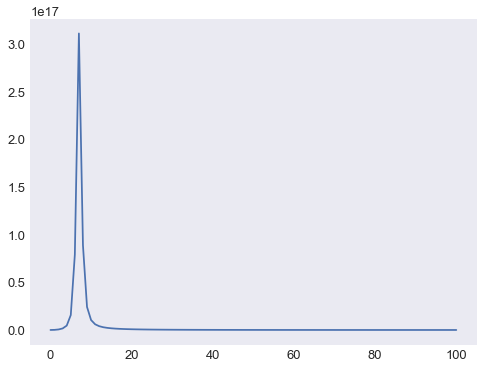

In [178]:
plt.plot(np.abs(f_sum[:,0])**2)

In [246]:
Ms = 348e3
A = 8.78e-12
D = 1.58e-3
H = (0, 0, 0)

In [247]:
t_exc = 0.5e-9
h_max = 50e-3
f_c = 100e9

In [248]:
3nm

SyntaxError: invalid syntax (<ipython-input-248-9bfb7437ff30>, line 1)

In [249]:
region = df.Region(p1=(-75e-9, -75e-9, 0), p2=(75e-9, 75e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(2e-9,2e-9,2e-9))

In [250]:
def ms_fun(pos):
    x, y, z = pos
    if x**2 + y**2 < (75e-9)**2:
        return Ms
    else:
        return 0
    
def val_fun(pos):
    x, y, z = pos
    if x**2 + y**2 < (20e-9)**2:
        return (0,0,-1)
    else:
        return (0,0,1)

field = df.Field(mesh=mesh, dim=3, value=val_fun, norm=ms_fun)

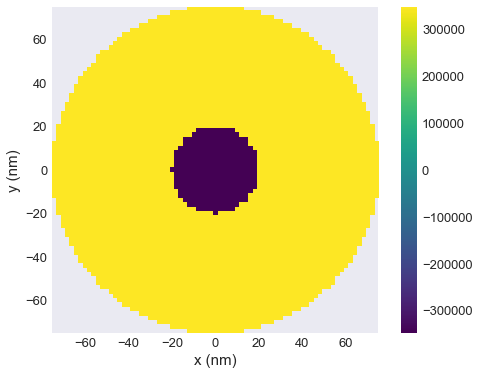

In [251]:
field.z.plane('z').mpl()

In [254]:
system = mm.System(name='disk')
system.energy = (mm.Zeeman(H=H) +
                 mm.Exchange(A=A) + 
                 mm.DMI(D=D, crystalclass='T') + 
                 mm.Demag())
system.dynamics = mm.Precession(gamma0=0.28) + mm.Damping(alpha=0.002)
system.m = field